### No dia 07/04 celebramos o dia Mundial da Saúde,uma ocasião que nos convida a refletir sobre o bem-estar global ,com especial atenção para o Brasil. Com isso em vista,  utilizamos dados disponíveis no Our World in Data, para conduzirmos análises sobre alguns indicadores de saúde. Entre eles, destacam-se as despesas governamentais com saúde, os índices de transtornos de ansiedade ao redor do mundo, bem como a pandemia e outros temas relevantes.



In [2]:
# Bibliotecas utilizadas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import numpy as np


##Prevalência de transtornos de ansiedade, homens vs. mulheres, 2019

Fonte: https://ourworldindata.org/mental-health

In [3]:
# Extraindo os dados advindos do Excel
dados_anxiety = pd.read_csv("anxiety-disorders-prevalence-males-vs-females.csv", sep=',')


In [4]:
# Criando um dicionario para mudar os nomes das colunas
novos_nomes_colunas = {"Entity": "País",
                       "Code" : "Sigla",
                       "Year" : "Ano",
                       "Anxiety disorders (share of population) - Sex: Male - Age: All ages" :"Ansiedade %Masculina",
                       "Anxiety disorders (share of population) - Sex: Female - Age: Age-standardized" : "Ansiedade %Feminina",
                       "Population (historical estimates)": "População",
                       "Continent":"Continente"}

In [5]:
# Mudando os nomes das colunas e filtrando o df apenas para o ano igual a 2019
dados_anxiety = dados_anxiety.rename(mapper = novos_nomes_colunas, axis=1)
dados_2019 = dados_anxiety[dados_anxiety['Ano'] == 2019]
dados_2019 = dados_2019.dropna(subset=['Ansiedade %Masculina', 'Ansiedade %Feminina','População'])

In [6]:
display(dados_2019)

,País,Sigla,Ano,Ansiedade %Masculina,Ansiedade %Feminina,População,Continente
30,Afghanistan,AFG,2019,3.375819,6.154591,3.776950e+07,NaN
655,Albania,ALB,2019,3.017732,4.924606,2.873883e+06,NaN
914,Algeria,DZA,2019,3.530850,6.048156,4.270537e+07,NaN
1203,American Samoa,ASM,2019,3.063234,5.031700,4.734100e+04,NaN
1317,Andorra,AND,2019,4.249790,7.051112,7.636100e+04,NaN
...,...,...,...,...,...,...,...
56826,Vietnam,VNM,2019,1.663950,2.971973,9.577671e+07,NaN
57285,World,OWID_WRL,2019,2.933640,4.694665,7.764951e+09,NaN
57545,Yemen,YEM,2019,3.432162,6.041606,3.154669e+07,NaN
57930,Zambia,ZMB,2019,2.860552,4.682098,1.838048e+07,NaN


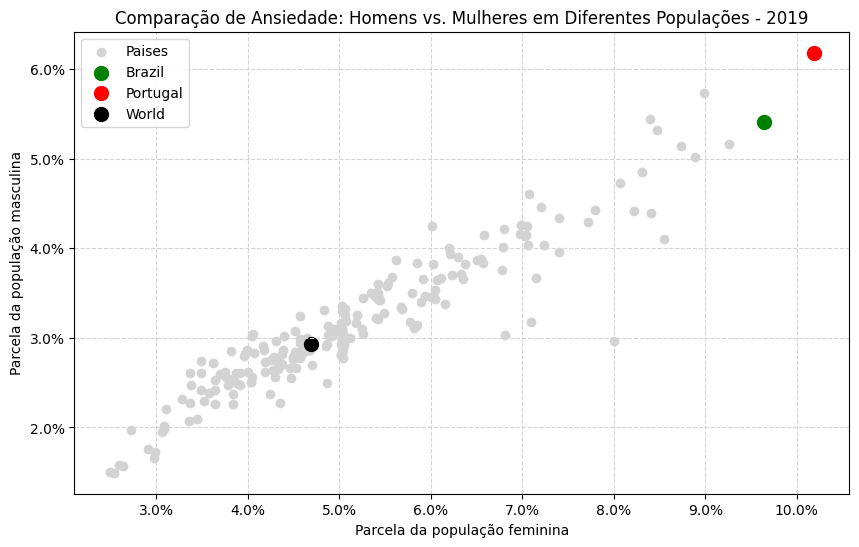

In [7]:
# Define o tamanho da figura (largura, altura) em polegadas
plt.figure(figsize=(10, 6))

# Cria o gráfico de dispersão
plt.scatter(dados_2019['Ansiedade %Feminina'], dados_2019['Ansiedade %Masculina'], label='Paises', color = 'lightgrey')

# Adiciona pontos destacados para alguns países específicos
paises_destacados = ['Brazil','Portugal','World']  # Exemplo de países para destacar
for pais in paises_destacados:
    x = dados_2019.loc[dados_2019['País'] == pais, 'Ansiedade %Feminina']
    y = dados_2019.loc[dados_2019['País'] == pais, 'Ansiedade %Masculina']
    cor = 'green' if pais == 'Brazil' else ('red' if pais == 'Portugal' else 'black') # Define a cor com base no país
    plt.scatter(x, y, label=pais, marker='o', s=100, color=cor)

# Adiciona título e rótulos dos eixos
plt.title('Comparação de Ansiedade: Homens vs. Mulheres em Diferentes Populações - 2019')
plt.xlabel('Parcela da população feminina')
plt.ylabel('Parcela da população masculina')


# Define o formato dos rótulos do eixo y como porcentagem
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.1f}%'.format(y)))
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.1f}%'.format(x)))

# Adiciona linhas de grade no fundo do gráfico
plt.grid(True, linestyle='--', color='lightgray')

# Adiciona legenda
plt.legend()

# Exibe o gráfico
plt.show()


Analisando dados de pesquisas conduzidas em mais de 200 países, direcionamos nosso olhar ao transtorno de ansiedade entre mulheres e homens. Os resultados revelam um padrão : em grande parte dessas nações, observa-se que as mulheres são mais impactadas por esse transtorno do que os homens.

No Brasil, especificamente em 2019, os números ficam em: 9,6% das mulheres enfrentavam o transtorno de ansiedade, em comparação com 5,4% dos homens. Sendo uns dos países com mais casos de diagnósticos ou não, superando a média global de ocorrências.

Além disso, Portugal surge como o país com maior incidência do transtorno, tanto em homens quanto em mulheres, afetando mais de 10% da população feminina.

Enquanto isso, a média global situa-se em 4,7% para mulheres e 2,9% para homens, afetando mais de 300 milhões de pessoas.

## Despesas governamentais com saúde em proporção do PIB

fonte: https://ourworldindata.org/financing-healthcare

In [8]:
# Extraindo os dados advindos do Excel
dados_expenditure = pd.read_csv("public-health-expenditure-share-gdp.csv",sep = ',')

In [9]:
# Alterando os nomes das colunas
novos_nomes_colunas = {"Entity": "País",
                       "Code" : "Sigla",
                       "Year" : "Ano",
                       "public_health_expenditure_pc_gdp" : "Despesas governamentais com saúde" }

dados_expenditure = dados_expenditure.rename(mapper = novos_nomes_colunas, axis=1)

In [10]:
# Filtrando o df para anos superiores a 2018
dados_expenditure = dados_expenditure.dropna(subset=['Despesas governamentais com saúde'])
dados_expenditure = dados_expenditure[(dados_expenditure['Ano'] >= 2018)]

In [11]:
display(dados_expenditure)

,País,Sigla,Ano,Despesas governamentais com saúde
8,Albania,ALB,2018,2.878
27,Argentina,ARG,2018,5.965
28,Argentina,ARG,2019,5.954
93,Australia,AUS,2018,7.009
94,Australia,AUS,2019,7.361
...,...,...,...,...
2110,United Kingdom,GBR,2020,9.923
2111,United Kingdom,GBR,2021,9.898
2176,United States,USA,2018,13.796
2177,United States,USA,2019,13.813


In [12]:
# Média global em despesas gorvenamentais

dados_agrupados = dados_expenditure.groupby('Ano')['Despesas governamentais com saúde'].mean().reset_index()
dados_agrupados

,Ano,Despesas governamentais com saúde
0,2018,5.813038
1,2019,6.005365
2,2020,7.221395
3,2021,7.303611


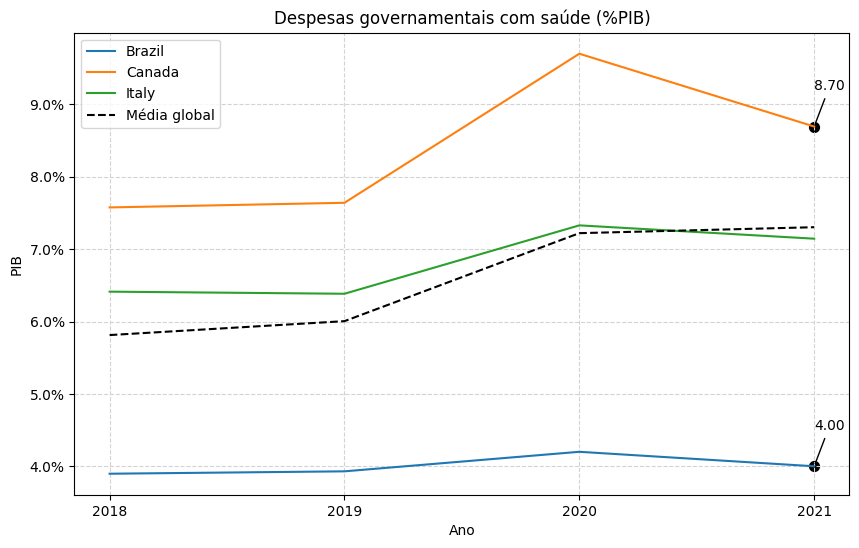

In [13]:
# Define o tamanho da figura (largura, altura) em polegadas
plt.figure(figsize=(10, 6))

# Paises que serão analisados
paises_mostrados = ['Brazil','Canada','Italy']

# Filtrar os dados para os países desejados
dados_paises_mostrados = dados_expenditure[dados_expenditure['País'].isin(paises_mostrados)]

# Plotar os dados
for pais in paises_mostrados:
    dados_pais = dados_paises_mostrados[dados_paises_mostrados['País'] == pais]
    plt.plot(dados_pais['Ano'], dados_pais['Despesas governamentais com saúde'], label=pais)
    plt.xticks(dados_agrupados['Ano'])

# Traçando a média global
plt.plot(dados_agrupados['Ano'], dados_agrupados['Despesas governamentais com saúde'], color='black', linestyle='--', label='Média global')

# Arrumar formato no eixo y
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.1f}%'.format(y)))

# Adiciona linhas de grade no fundo do gráfico
plt.grid(True, linestyle='--', color='lightgray')

# Formatando o eixo x para incluir apenas anos inteiros
plt.xticks(np.arange(dados_paises_mostrados['Ano'].min(), dados_paises_mostrados['Ano'].max() + 1, 1))

for pais in paises_mostrados:
    if pais == 'Brazil' or pais == 'Canada':
        dados_pais = dados_paises_mostrados[dados_paises_mostrados['País'] == pais]
        ultimo_ano = dados_pais['Ano'].iloc[-1]
        ultimo_valor = dados_pais['Despesas governamentais com saúde'].iloc[-1]
        if ultimo_ano == 2021:
            plt.annotate(f'{ultimo_valor:.2f}', (ultimo_ano, ultimo_valor), xytext=(ultimo_ano, ultimo_valor + 0.5),
                     arrowprops=dict(facecolor='black', arrowstyle='-'))
            plt.scatter(ultimo_ano, ultimo_valor, color='black', marker='o', s=50)

# Adicionar título e rótulos dos eixos
plt.title('Despesas governamentais com saúde (%PIB)')
plt.xlabel('Ano')
plt.ylabel('PIB')

# Adicionar legenda
plt.legend()

# Exibe o gráfico
plt.show()

Esta análise se concentra na alocação de recursos para saúde em relação ao Produto Interno Bruto (PIB) de diferentes países, utilizando dados divulgados por algumas nações. Para realizar comparações significativas, buscamos examinar países com PIBs próximos ao longo dos anos, como é o caso do Brasil, Itália e Canadá. Notavelmente, observa-se que o Brasil é aquele que destinou menos recursos para o setor de saúde em comparação com os outros países com PIBs similares. E quando comparado com a média global de alocação de recursos para saúde, o Brasil permanece abaixo desse padrão.

